In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import yaml

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

"""
Name of results folder to plot. Only works for the following config:
    EXPERIMENT_TYPE: run
    SIMULATION_TYPE: single
    ENSEMBLE_COUNT: 1
    REVERSAL_COUNT: 1
    TRIAL_COUNT: 30
"""
results_folder = 'experiments/run/single/output_1_20240621_000000'

with open(f'{results_folder}/config.yaml') as configfile:
    config = yaml.safe_load(configfile)

with open(f'{results_folder}/results.pkl', 'rb') as file:
    results_dict = pickle.load(file)

In [2]:
ensemble_count = config['ENSEMBLE_COUNT']
reversal_count = config['REVERSAL_COUNT']
trial_count = config['TRIAL_COUNT']
tau_val = config['TAU_VAL']
k_val = config['K_VAL']
k_decay = config['K_DECAY']

In [3]:
action_list = results_dict['action_list']
stimulus_list = results_dict['stimulus_list']
memory_list = results_dict['memory_list']
p_list = results_dict['p_list']
run_stat = results_dict['run_stat']

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found bec

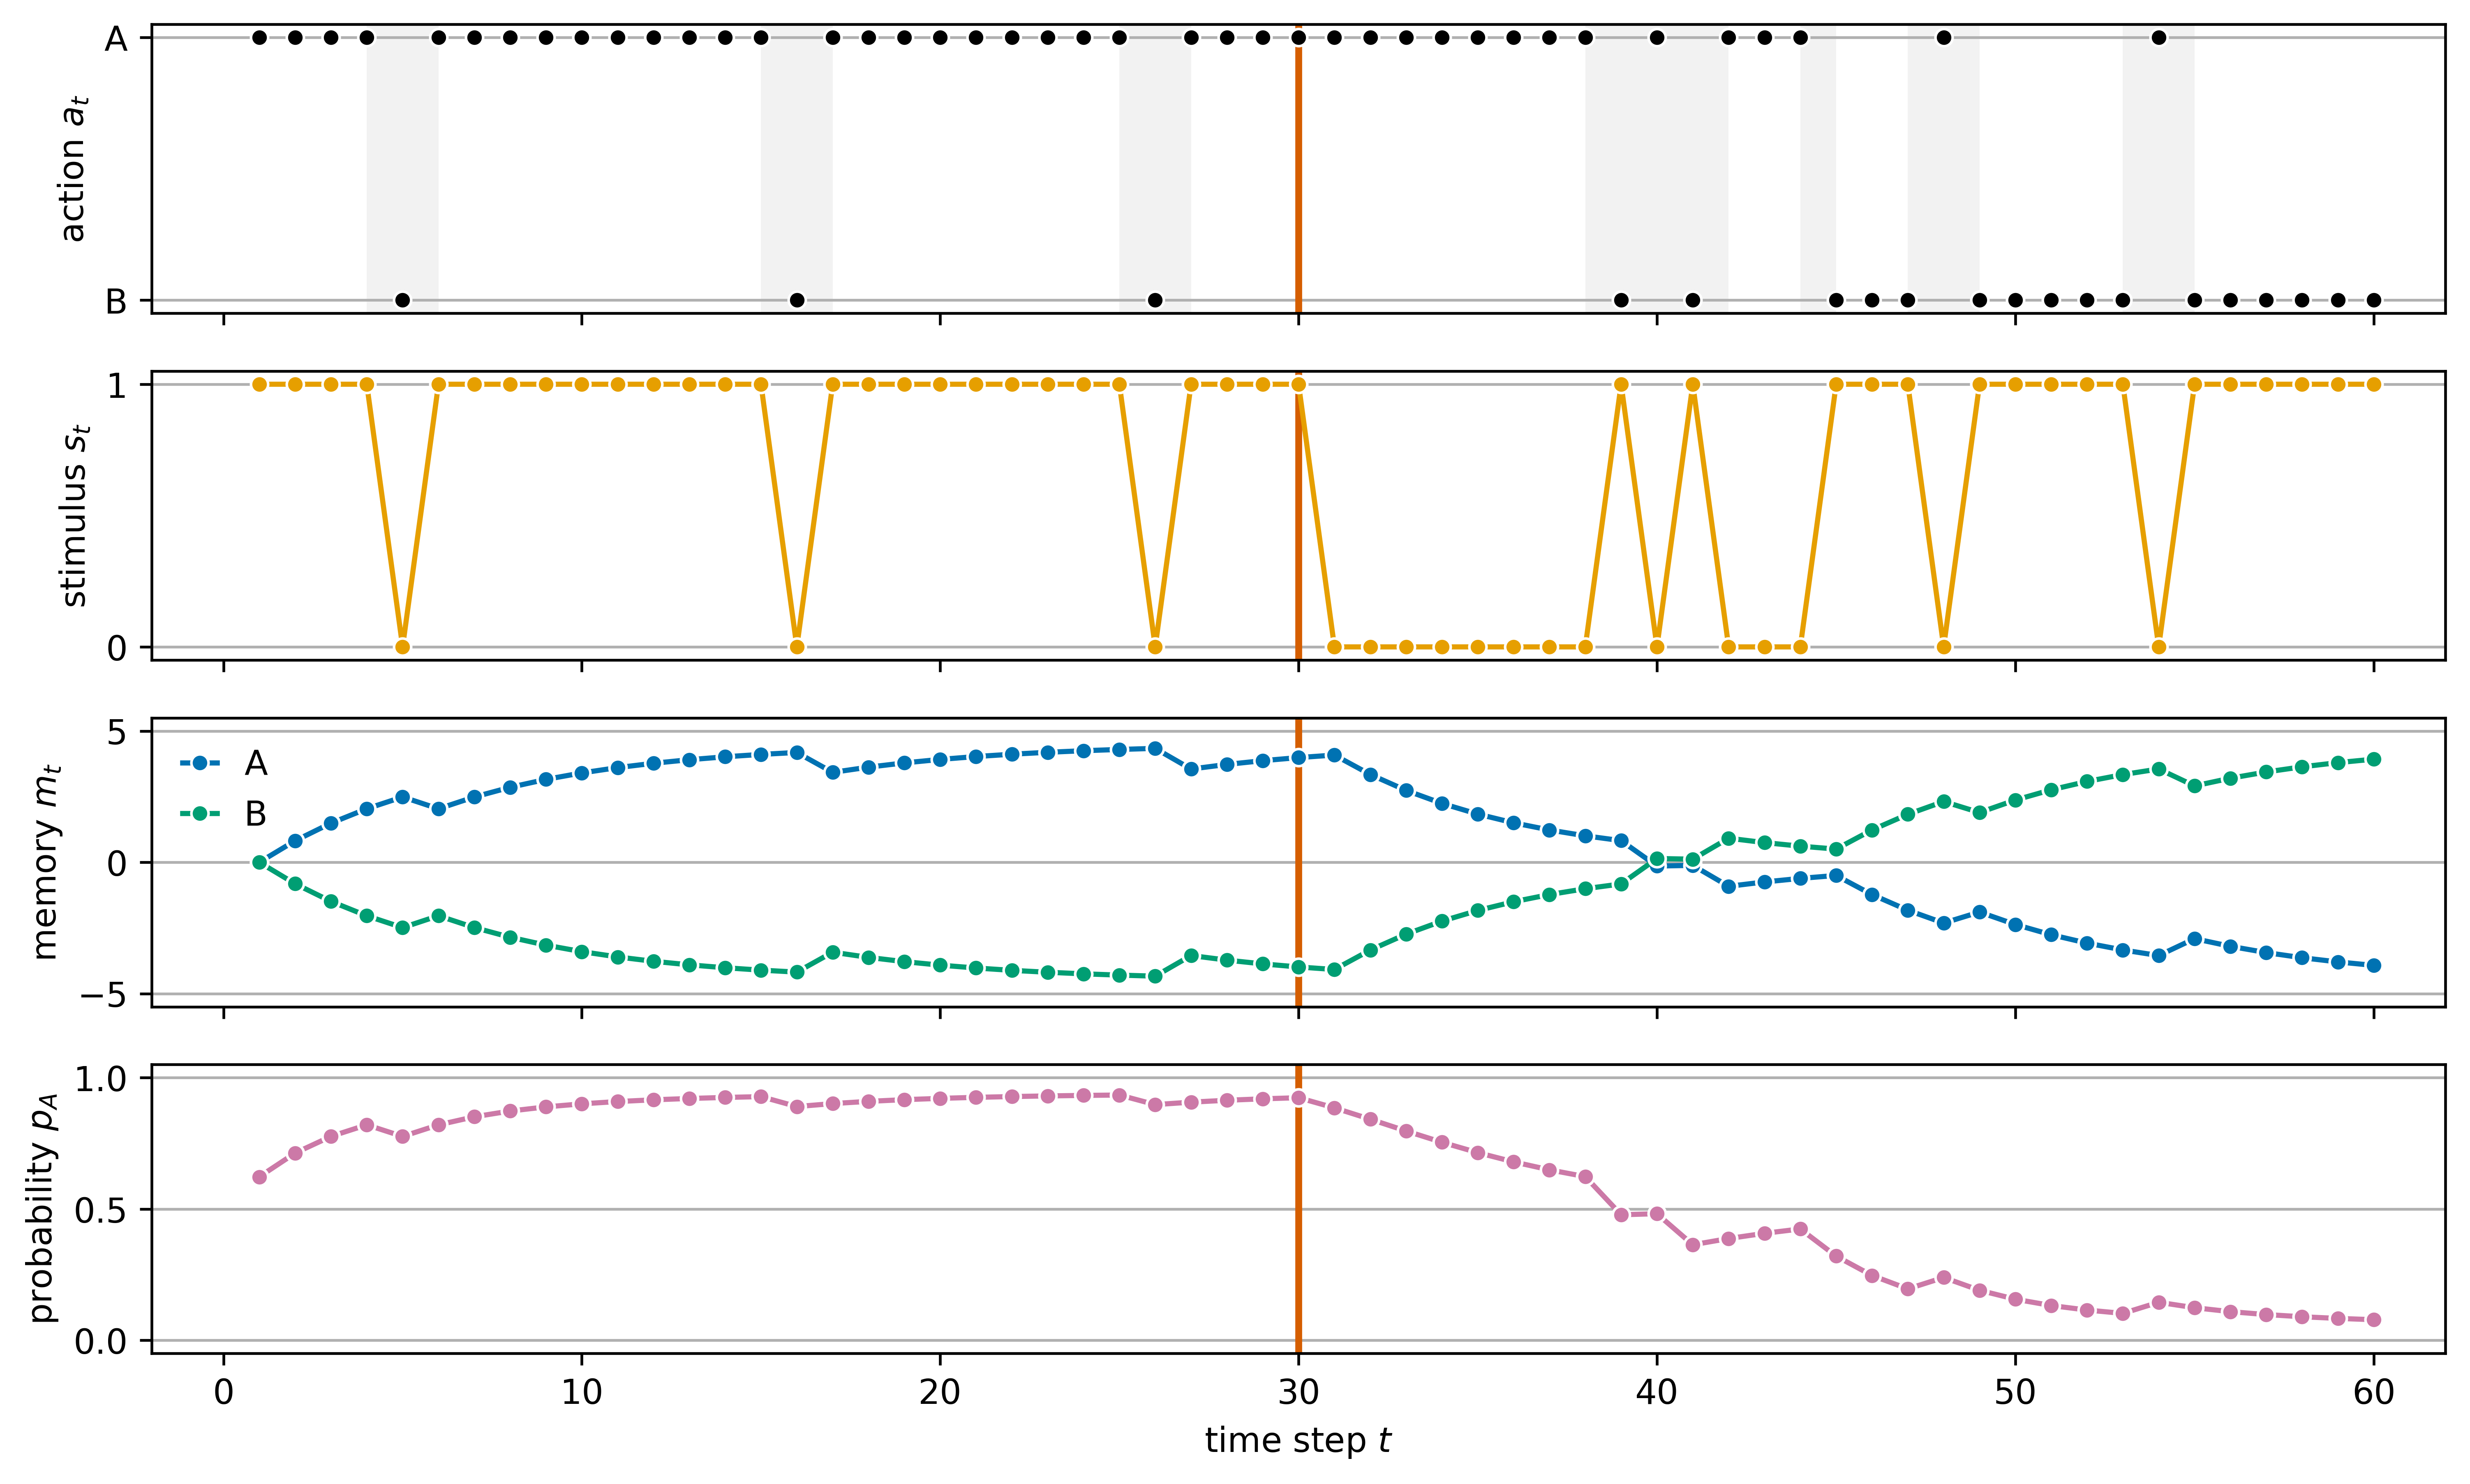

In [4]:
y_val = []
for behaviour_choice in action_list:
    if behaviour_choice == 'A':
        y_val.append(1)
    else:
        y_val.append(0)

fig, ax = plt.subplots(4, 1, figsize=(12, 7), sharex=True)
fig.dpi = 600

for idx in range(1,reversal_count+1):
    ax[0].axvline(trial_count*idx, color='#D55E00', linewidth=2)
    ax[1].axvline(trial_count*idx, color='#D55E00', linewidth=2)
    ax[2].axvline(trial_count*idx, color='#D55E00', linewidth=2)
    ax[3].axvline(trial_count*idx, color='#D55E00', linewidth=2)

for idx, val in enumerate(y_val, 1):
    if val == 1:
        color = 'black'
    else:
        color = 'black'
    ax[0].plot(idx, val, color=color, linestyle='', marker='o', markeredgecolor='w', markeredgewidth=0.75, markersize=5)
ax[0].set_yticks([0, 1], ['B', 'A'])

fill_val = []
for idx, (val1, val2) in enumerate(zip(action_list[:-1], action_list[1:])):
    if val1 != val2:
        fill_val.append((idx, idx+1))

for val in fill_val:
    ax[0].axvspan(val[0]+1, val[1]+1, alpha=0.2, color='silver', lw=0)

ax[1].plot(np.arange(1,len(y_val)+1), stimulus_list, color='#E69F00', marker='o', markeredgecolor='w', markeredgewidth=0.75, markersize=5)
ax[1].set_yticks([0, 1])

ax[2].plot(np.arange(1,len(y_val)+1), memory_list, color='#0072B2', label='A', marker='o', markeredgecolor='w', markeredgewidth=0.75, markersize=5)
ax[2].plot(np.arange(1,len(y_val)+1), -np.array(memory_list), color='#009E73', label='B', marker='o', markeredgecolor='w', markeredgewidth=0.75, markersize=5)
ax[2].legend(frameon=False, handlelength=1)
ax[2].set_yticks([-5, 0, 5])
ax[2].set_ylim(-5.5,5.5)

ax[3].plot(np.arange(1,len(y_val)+1), p_list, color='#CC79A7', marker='o', markeredgecolor='w', markeredgewidth=0.75, markersize=5)
ax[3].set_yticks([0, 0.5, 1])
ax[3].set_ylim(-0.05,1.05)

ax[3].set_xlabel('time step $t$')

ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[2].yaxis.grid()
ax[3].yaxis.grid()

ax[0].set_ylabel('action $a_t$')
ax[1].set_ylabel('stimulus $s_t$')
ax[2].set_ylabel('memory $m_t$')
ax[3].set_ylabel('probability $p_A$')

ax[0].set_xlim(-2,(trial_count * (reversal_count+1))+2)
ax[1].set_xlim(-2,(trial_count * (reversal_count+1))+2)
ax[2].set_xlim(-2,(trial_count * (reversal_count+1))+2)
ax[3].set_xlim(-2,(trial_count * (reversal_count+1))+2)

plt.show()